# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# open file
df = pd.read_csv('data/ames.csv', index_col=0)

The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

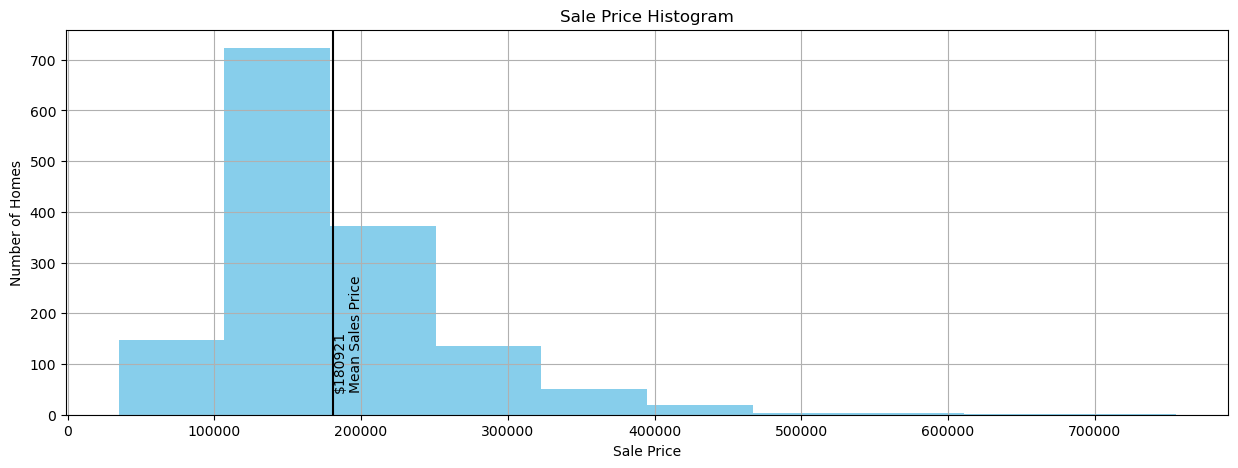

In [21]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the histogram
ax.grid()
ax.hist(
    x=df["SalePrice"],
    label="",
    bins=10,
    color="#87CEEB"
)

# Add a vertical line for the mean
mean = df['SalePrice'].mean()
ax.axvline(x=mean, color='#000000', label='Mean Home Price')
plt.text(mean, 50, f"${int(mean)}\nMean Sales Price", rotation='vertical')

# Set title and labels
ax.set_title("Sale Price Histogram")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Homes")

plt.show()  # Display the plot

Now, print out the mean, median, and standard deviation:

In [14]:
print(
f"""Mean: {df['SalePrice'].mean()}
Median: {df['SalePrice'].median()}
Standard Deviation: {df['SalePrice'].std()}
""")

Mean: 180921.19589041095
Median: 163000.0
Standard Deviation: 79442.50288288663



In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
Most of the houses are priced between 100,000 and 200,000. However, there are a few outliers that are about two to three times the median price. This 
also shows that the outliers contribute greatly to skewing the average home prices slightly above the median home price. 
"""

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

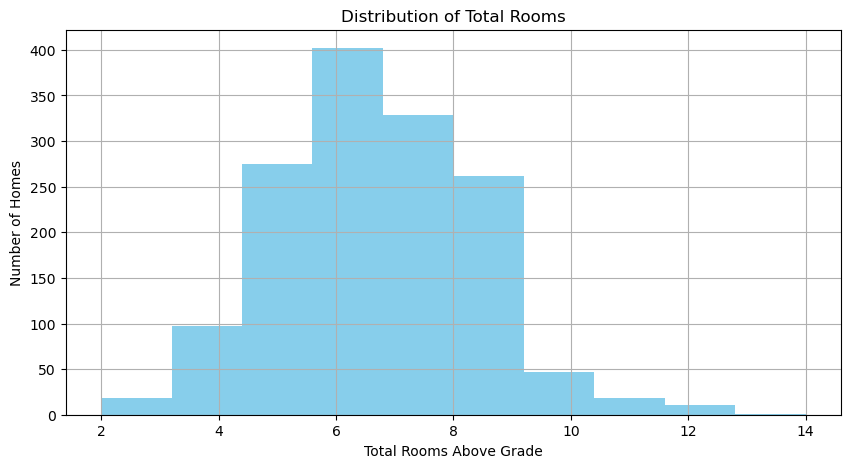

In [19]:
# Set up plot
fig, ax = plt.subplots(figsize=(10,5))

# Plot the histogram
ax.grid()
ax.hist(
    x=df["TotRmsAbvGrd"],
    label="Total Rooms Above Grade",
    bins=10,
    color="#87CEEB"
)

ax.set_title("Distribution of Total Rooms")
ax.set_xlabel("Total Rooms Above Grade")
ax.set_ylabel("Number of Homes");

Now, print out the mean, median, and standard deviation:

In [22]:
print(
f"""Mean: {df['TotRmsAbvGrd'].mean()}
Median: {df['TotRmsAbvGrd'].median()}
STD: {df['TotRmsAbvGrd'].std()}
""")

Mean: 6.517808219178082
Median: 6.0
STD: 1.625393290584064



In the cell below, interpret the above information.

In [ ]:
# Replace None with appropriate text
"""
The normal distribution hypothesis suggests that most houses fall within a certain range of room counts (around 6 rooms in this case). While there are 
outliers (houses with significantly more or fewer rooms), the overall distribution is less skewed compared to the sale price distribution.
"""

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

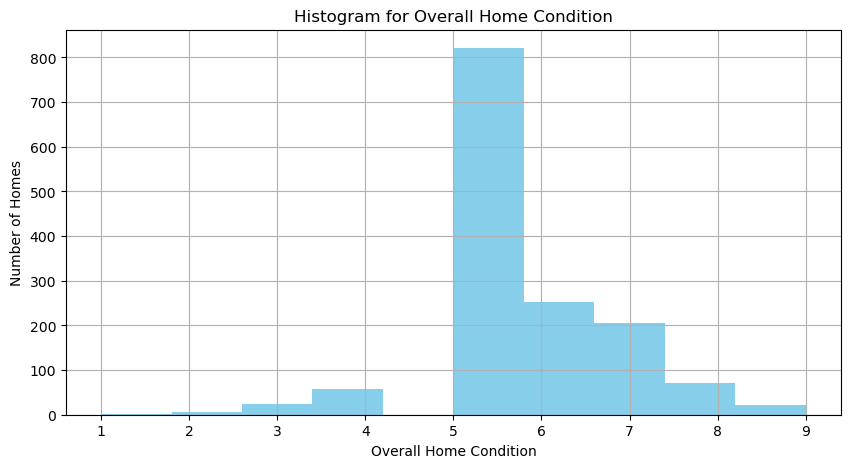

In [28]:
# Set up plot
fig, ax = plt.subplots(figsize=(10,5))

# Plot
ax.hist(
    x=df["OverallCond"],
    label="Overall Condition",
    bins = 10,
    color="#87CEEB"
)
ax.grid()


ax.set_title("Histogram for Overall Home Condition")
ax.set_xlabel("Overall Home Condition")
ax.set_ylabel("Number of Homes");

Now, print out the mean, median, and standard deviation:

In [27]:
print(
f"""Mean: {df['OverallCond'].mean()}
Median: {df['OverallCond'].median()}
STD: {df['OverallCond'].std()}
""")

Mean: 5.575342465753424
Median: 5.0
STD: 1.1127993367127367



In the cell below, interpret the above information.

In [48]:
"""
The Overall Condition of the house is a ranked from 1 to 10.  As the following data on percentiles suggests, this data is more categorical in nature.

"""
percentile_25, percentile_75 = df['OverallCond'].quantile([0.25, 0.75])
print(f"The 25th percentile is: {int(percentile_25)}")
print(f"The 75th percentile is: {int(percentile_75)}")

The 25th percentile is: 5
The 75th percentile is: 6


## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [32]:
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [33]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

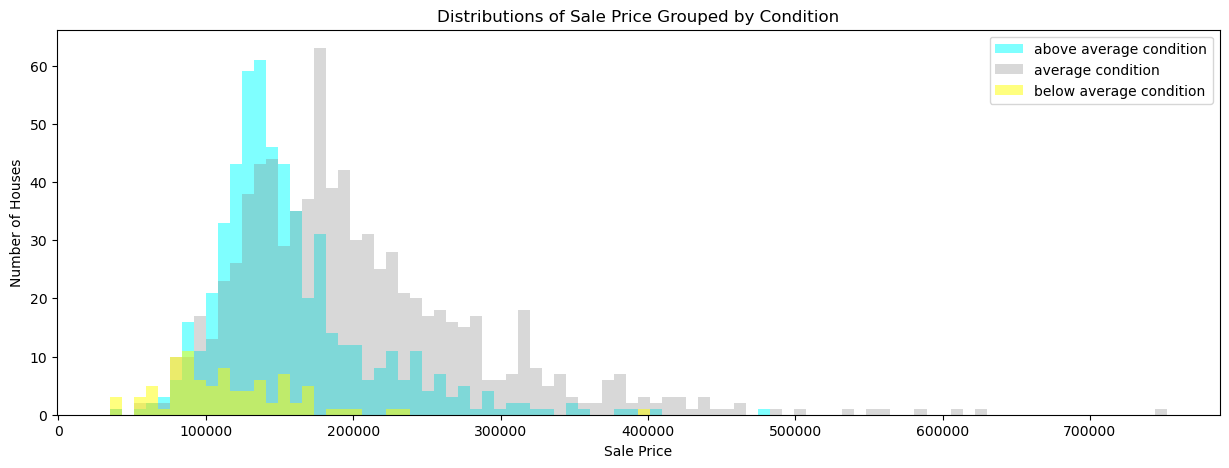

In [34]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [ ]:
"""
The histogram overlays provide a clear visual representation: homes in better condition tend to have higher sale prices. However, there’s an intriguing 
observation—the presence of a few homes labeled as ‘below average condition’ with surprisingly high sales prices (around $400k). Additionally, the most 
expensive homes predominantly fall into the ‘average condition’ category.

Several factors could explain this pattern:
1. Home Flips: Some of the home sales might be ‘flips,’ where properties were improved or renovated before being sold. These improvements could 
significantly impact the selling price.
2. Location Matters: Location plays a crucial role in real estate. It’s possible that certain areas command higher prices regardless of the home’s 
condition.

To delve deeper, one could investigate the ‘below average condition’ homes with unexpectedly high sale prices. Analyzing common features or patterns 
among these outliers could reveal valuable insights.
"""

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [38]:
# Get a list of correlations with SalePrice, sorted from smallest to largest
correlation_series = df.corr(numeric_only=True)['SalePrice'].sort_values()

# Select the second-to-last correlation (excluding the self-correlation)
max_corr_value = correlation_series.iloc[-2]
max_corr_column = correlation_series.index[-2]

print("Most Positively Correlated Column:", max_corr_column)
print("Maximum Correlation Value:", max_corr_value)

Most Positively Correlated Column: OverallQual
Maximum Correlation Value: 0.7909816005838053


Now, find the ***most negatively correlated*** column:

In [43]:
import pandas as pd
# Select only numeric columns (exclude non-numeric columns)
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Get the correlations with 'SalePrice' and sort them in ascending order
correlation_series = corr_matrix['SalePrice'].sort_values()

# Select the most negatively correlated column (excluding the self-correlation)
most_neg_corr_value = correlation_series.iloc[0]  # First value is the most negative
most_neg_corr_column = correlation_series.index[0]

print("Most Negatively Correlated Column:", most_neg_corr_column)
print("Correlation Value:", most_neg_corr_value)

Most Negatively Correlated Column: KitchenAbvGr
Correlation Value: -0.13590737084214105


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

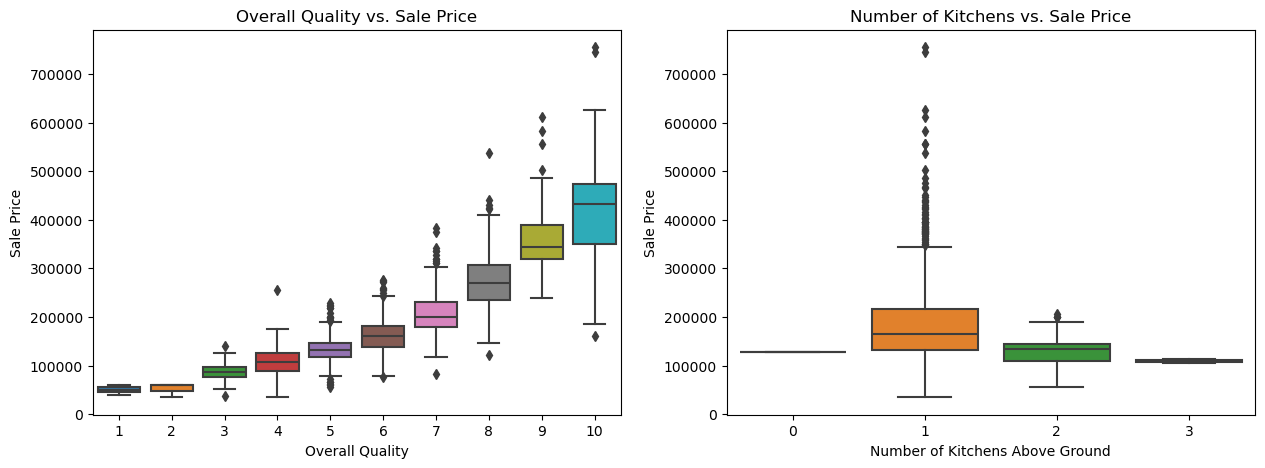

In [45]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[max_corr_column],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[most_neg_corr_column],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Overall Quality vs. Sale Price")
ax1.set_xlabel("Overall Quality")
ax1.set_ylabel("Sale Price")
ax2.set_title("Number of Kitchens vs. Sale Price")
ax2.set_xlabel("Number of Kitchens Above Ground")
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [ ]:
# Replace None with appropriate text
"""
In the Ames Housing Dataset, we observed interesting correlations between features and the sale price of homes. Here are the key findings:

1. Overall Quality (Positively Correlated): The ‘Overall Quality’ feature showed the strongest positive correlation with the sale price. As the overall 
quality of a home increases (rated on a scale from 1 to 10), we expect the sale price to rise as well. This relationship aligns with our 
intuition—higher-quality homes tend to command higher prices.
2. Kitchens Above Grade (Negatively Correlated): Surprisingly, the number of kitchens above grade had the strongest negative correlation with the sale 
price. Most homes typically have only one kitchen. Therefore, this negative correlation might seem counterintuitive. The boxplot for ‘Kitchens Above 
Grade’ reveals that the majority of homes fall within the 0 to 1 kitchen range. However, there were outliers with 2 or 3 kitchens. For these uncommon 
houses with multiple kitchens, other factors (such as the home’s age or unique features) may influence their lower sale prices.

In summary, while the overall quality–sale price correlation appears valid, the usefulness of the ‘Kitchens Above Grade’ correlation is questionable 
due to its skewed distribution. Exploring outliers can provide additional insights.
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [46]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

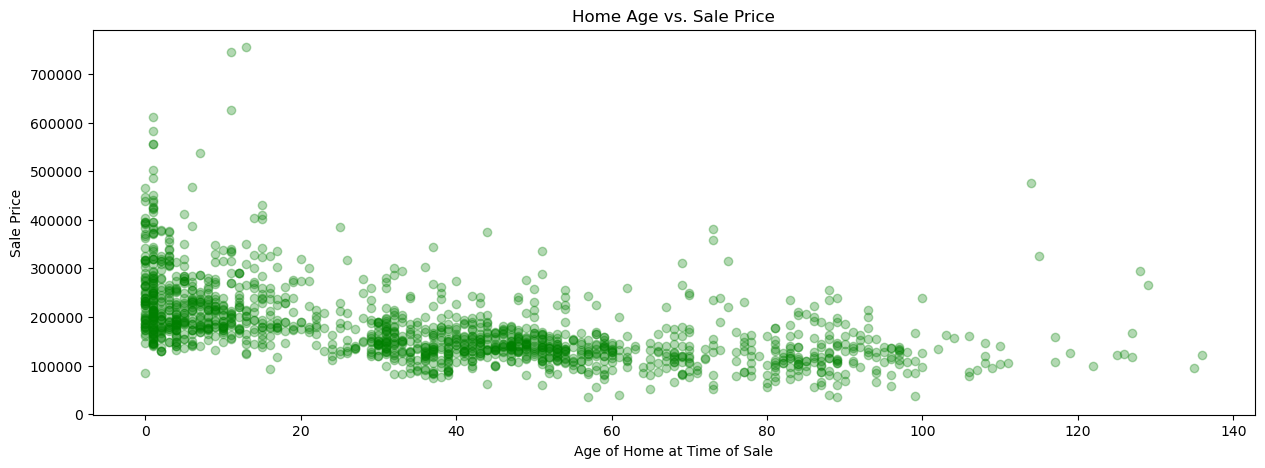

In [47]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [ ]:
"""
Although most homes, regardless of age, were sold in the $150k to $200k range, the highest sale prices were mainly associated with new builds and a 
select few old homes. Over the past decades, we see evidence of housing market fluctuations. For instance, there are relatively few 20-year-old houses 
being sold compared to 30-60 year-old houses. This discrepancy hints at potential housing booms and busts, potentially during the financial crisis of 
the late 2000s.
"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.